IRIS DATASET DESCRIPTION

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


SAMPLE DATA (FIRST 5 ROWS)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


KMeans Silhouette Score: 0.460
Hierarchical Silhouette Score: 0.447


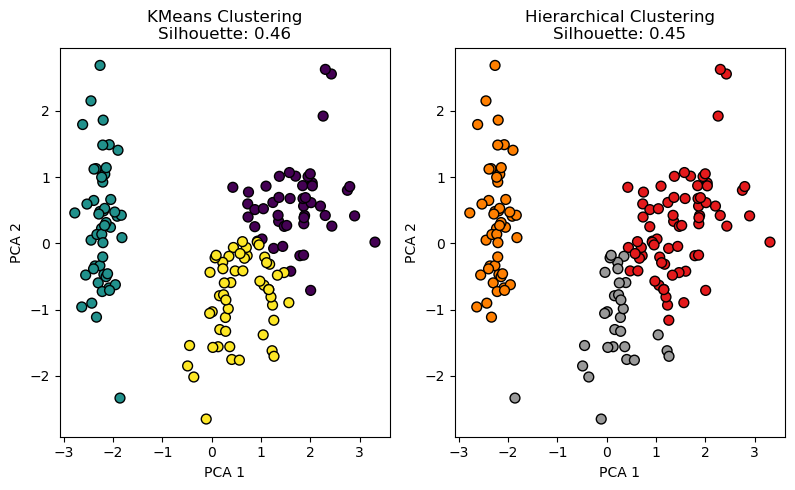

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# 1. Loading and Preprocessing
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  


# Print dataset description
print("="*80)
print("IRIS DATASET DESCRIPTION")
print("="*80)
print("\nFeature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("\n")

# Print sample data (first 5 rows)
print("="*80)
print("SAMPLE DATA (FIRST 5 ROWS)")
print("="*80)
print(X.head())
print("\n")


# Standardize the data (important for clustering algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2A. KMeans Clustering
# Description: 
# KMeans partitions data into K clusters by minimizing within-cluster variance
# It works well when clusters are spherical and similar in size

# Apply KMeans with optimal K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


# Evaluate clustering performance
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
print(f"KMeans Silhouette Score: {silhouette_avg:.3f}")

# 2B. Hierarchical Clustering
# Description:
# Hierarchical clustering builds nested clusters by successively merging or splitting clusters
# It creates a dendrogram that shows cluster relationships

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_labels = hierarchical.fit_predict(X_scaled)

# Evaluate clustering performance
hier_silhouette = silhouette_score(X_scaled, hier_labels)
print(f"Hierarchical Silhouette Score: {hier_silhouette:.3f}")

# Visualization using PCA for 2D plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

# KMeans plot
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.title(f'KMeans Clustering\nSilhouette: {silhouette_avg:.2f}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Hierarchical plot
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hier_labels, cmap='Set1', edgecolor='k', s=50)
plt.title(f'Hierarchical Clustering\nSilhouette: {hier_silhouette:.2f}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')



plt.tight_layout()
plt.show()

